# Loading the data

In [2]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

df = read_csv('resources/dataset.csv')

# Data Analysis before normalization

In [3]:
from matplotlib import pyplot as plt

## Shape and types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
df.shape

(4920, 18)

In [6]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


## Features and Classes

In [8]:
# All diseases entries
diseasesEntries = df['Disease']

# List of all diseases
diseases = diseasesEntries.unique()

#trim the diseases
diseases = [disease.strip() for disease in diseases]

# All symptoms entries
symptomsEntries = df[df.columns.difference(['Disease'])].stack()

# List of all symptoms
symptoms = symptomsEntries.unique()

#trim the symptoms
symptoms = [symptom.strip() for symptom in symptoms]


### Classes (Diseases)

In [9]:
df.groupby('Disease').size()

Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [10]:
len(diseases)

41

### Features (Symptoms)

In [11]:
pd.DataFrame(symptoms)

,0
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,dischromic _patches
4,continuous_sneezing
...,...
126,small_dents_in_nails
127,inflammatory_nails
128,blister
129,red_sore_around_nose


In [12]:
len(symptoms)

131

#### Number of symptoms per entry

<AxesSubplot:ylabel='Density'>

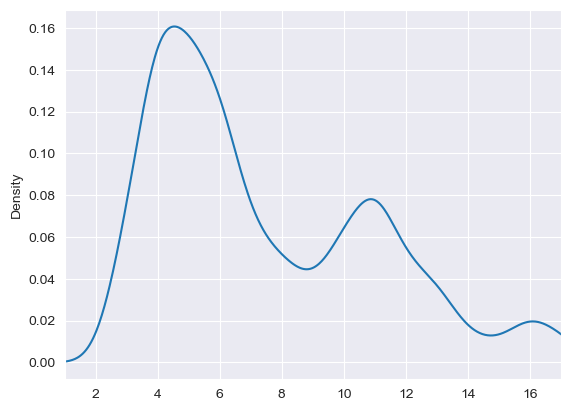

In [13]:
number_of_symptoms_per_entry = df.iloc[:, 1:].count(axis=1)
number_of_symptoms_per_entry.plot(kind='density', xlim=(1, 17))

## Duplicates analysis

In [14]:
df.shape

(4920, 18)

In [15]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.shape

(304, 18)

<AxesSubplot:>

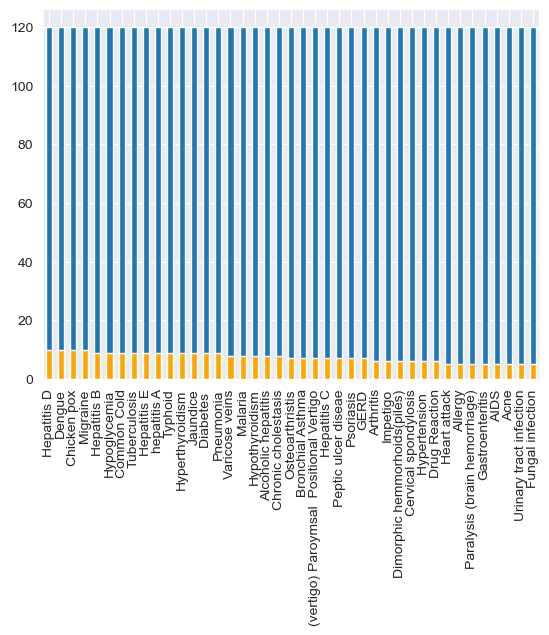

In [16]:
number_of_entries_per_disease = df['Disease'].value_counts()
number_of_entries_per_disease_without_duplicates = df_without_duplicates['Disease'].value_counts()

number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# One hot encoding

## Conversion

### From `Symptom_1` to `Symptom_17` to `Symptoms`




Convert from
```json
{
    "Disease": ["String"],
    "Symptom_1": ["String"],
    "...":["String"],
    "Symptom_17": ["String"]
} 
```
to
```json
{
    "Disease": ["String"], 
    "Symptoms": [["String"]]
}
```

In [17]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

symptom_cols = [col for col in df if col.startswith('Symptom_')]
df_converted = df.apply(lambda row: [symptoms for symptoms in row[symptom_cols] if pd.notnull(symptoms)], axis=1).to_frame(name='Symptoms')
df_converted['Disease'] = diseasesEntries
df_converted = df_converted[['Disease', 'Symptoms']]

#fix disease and symptoms names
df_converted['Disease'] = df_converted['Disease'].apply(lambda x: x.strip())
df_converted['Symptoms'] = df_converted['Symptoms'].apply(lambda x: [symptom.strip() for symptom in x])

df_converted.head()


,Disease,Symptoms
0,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions]"


### From `Symptoms` to `Symptoms_one_hot`

In [19]:
Symptoms_one_hot = pd.get_dummies(df_converted['Symptoms'].apply(pd.Series).stack()).groupby(level=0).sum()
Symptoms_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### From `Diease` to `Disease_one_hot`

In [20]:
Disease_one_hot = pd.get_dummies(df_converted['Disease'])
Disease_one_hot.head()

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging

In [21]:
df_one_hot = pd.concat([Symptoms_one_hot, Disease_one_hot], axis=1)

symptoms_cols_range = range(0, len(symptoms))
diseases_cols_range = range(len(symptoms), len(symptoms) + len(diseases))

df_one_hot.columns

Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort',
       ...
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A'],
      dtype='object', length=172)

# Feature based sampling

In [22]:
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

## Duplicates analysis before sampling

In [23]:
df_one_hot.shape

(4920, 172)

In [24]:
df_one_hot_without_duplicates.shape

(304, 172)

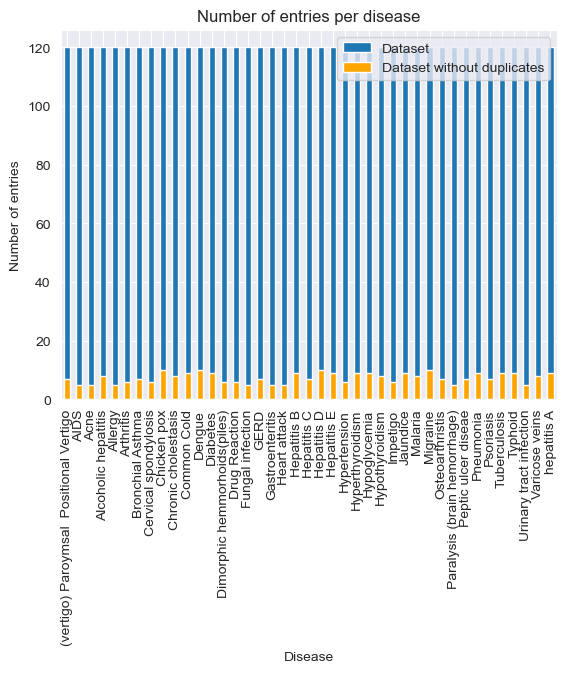

In [25]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after removing duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Dataset', 'Dataset without duplicates'])

## Sampling

In [26]:
df_on_hot_train = pd.DataFrame(columns=df_one_hot.columns, dtype=np.uint8)
df_on_hot_test = pd.DataFrame(columns=df_one_hot.columns, dtype=np.uint8)

# Split in identical subsets
identical_subsets = pd.DataFrame({'subset': []})
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

for subset_model in df_one_hot_without_duplicates.values :
    subset = pd.DataFrame(columns=df_one_hot.columns)
    for element in df_one_hot.values :
        if np.array_equal(subset_model, element) :
            subset.loc[len(subset)] = element
    identical_subsets.loc[len(identical_subsets)] = [subset]

print('{} subsets identified'.format(len(identical_subsets)))
print('Subsets contain {:.2f} elements on average'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))

# divide by a number of elements in each subset
for index, row in identical_subsets.iterrows() :
    subset = row['subset']
    subset_len = len(subset)
    subset_len_aim = int(subset_len / 5)
    if subset_len_aim == 0 :
        subset_len_aim = 1
    subset = subset.iloc[0:subset_len_aim]
    identical_subsets.loc[index] = [subset]

print('Subsets contain {:.2f} elements on average after sampling'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))
print('{} subsets are empty'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 0])))
print('{} subsets contain only one element'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 1])))

split_ratio = 0.5

# Split subsets in train and test based on disease, so for 10 subsets we have 8 subsets in train and 2 in test
for disease in diseases :
    disease_subsets = identical_subsets[identical_subsets['subset'].apply(lambda x: x[disease].values[0] == 1)]

    # Shuffle subsets
    disease_subsets = disease_subsets.sample(frac=1)

    train_subsets = disease_subsets.iloc[0:int(len(disease_subsets) * split_ratio)]
    test_subsets = disease_subsets.iloc[int(len(disease_subsets) * split_ratio):len(disease_subsets)]
    df_on_hot_train = pd.concat([df_on_hot_train, pd.concat([row['subset'] for index, row in train_subsets.iterrows()])])
    df_on_hot_test = pd.concat([df_on_hot_test, pd.concat([row['subset'] for index, row in test_subsets.iterrows()])])

# Concatenate all subsets
df_one_hot_sampled = pd.concat([df_on_hot_train, df_on_hot_test])

print('Train dataset contains {} elements'.format(len(df_on_hot_train)))
print('Test dataset contains {} elements'.format(len(df_on_hot_test)))
print('Train dataset contains {:.2f} elements per disease on average'.format(df_on_hot_train.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0).mean()))
print('Test dataset contains {:.2f} elements per disease on average'.format(df_on_hot_test.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0).mean()))

304 subsets identified
Subsets contain 16.18 elements on average
Subsets contain 2.97 elements on average after sampling
0 subsets are empty
216 subsets contain only one element
Train dataset contains 397 elements
Test dataset contains 507 elements
Train dataset contains 9.68 elements per disease on average
Test dataset contains 12.37 elements per disease on average


## Data Analysis after sampling

In [27]:
df_one_hot_sampled.shape

(904, 172)

In [28]:
df_one_hot_sampled_without_duplicates = df_one_hot_sampled.drop_duplicates()
df_one_hot_sampled_without_duplicates.shape

(304, 172)

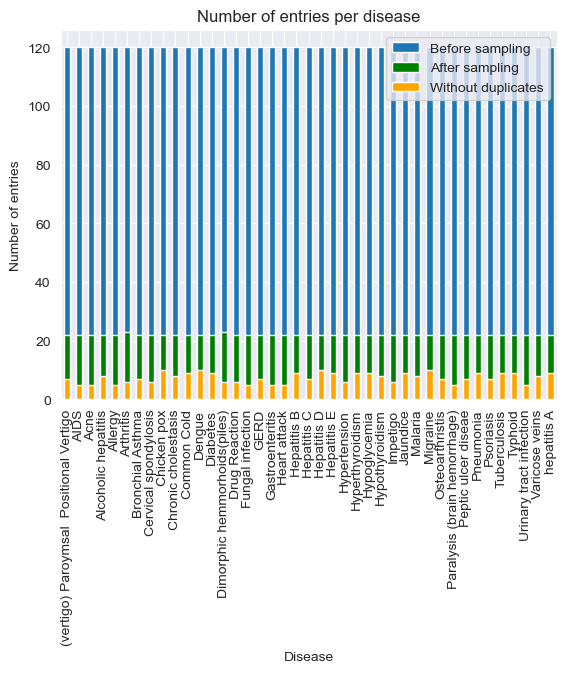

In [29]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_sampled = df_one_hot_sampled.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after sampling, and without duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_sampled.plot.bar(color='green')
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Before sampling', 'After sampling', 'Without duplicates'])


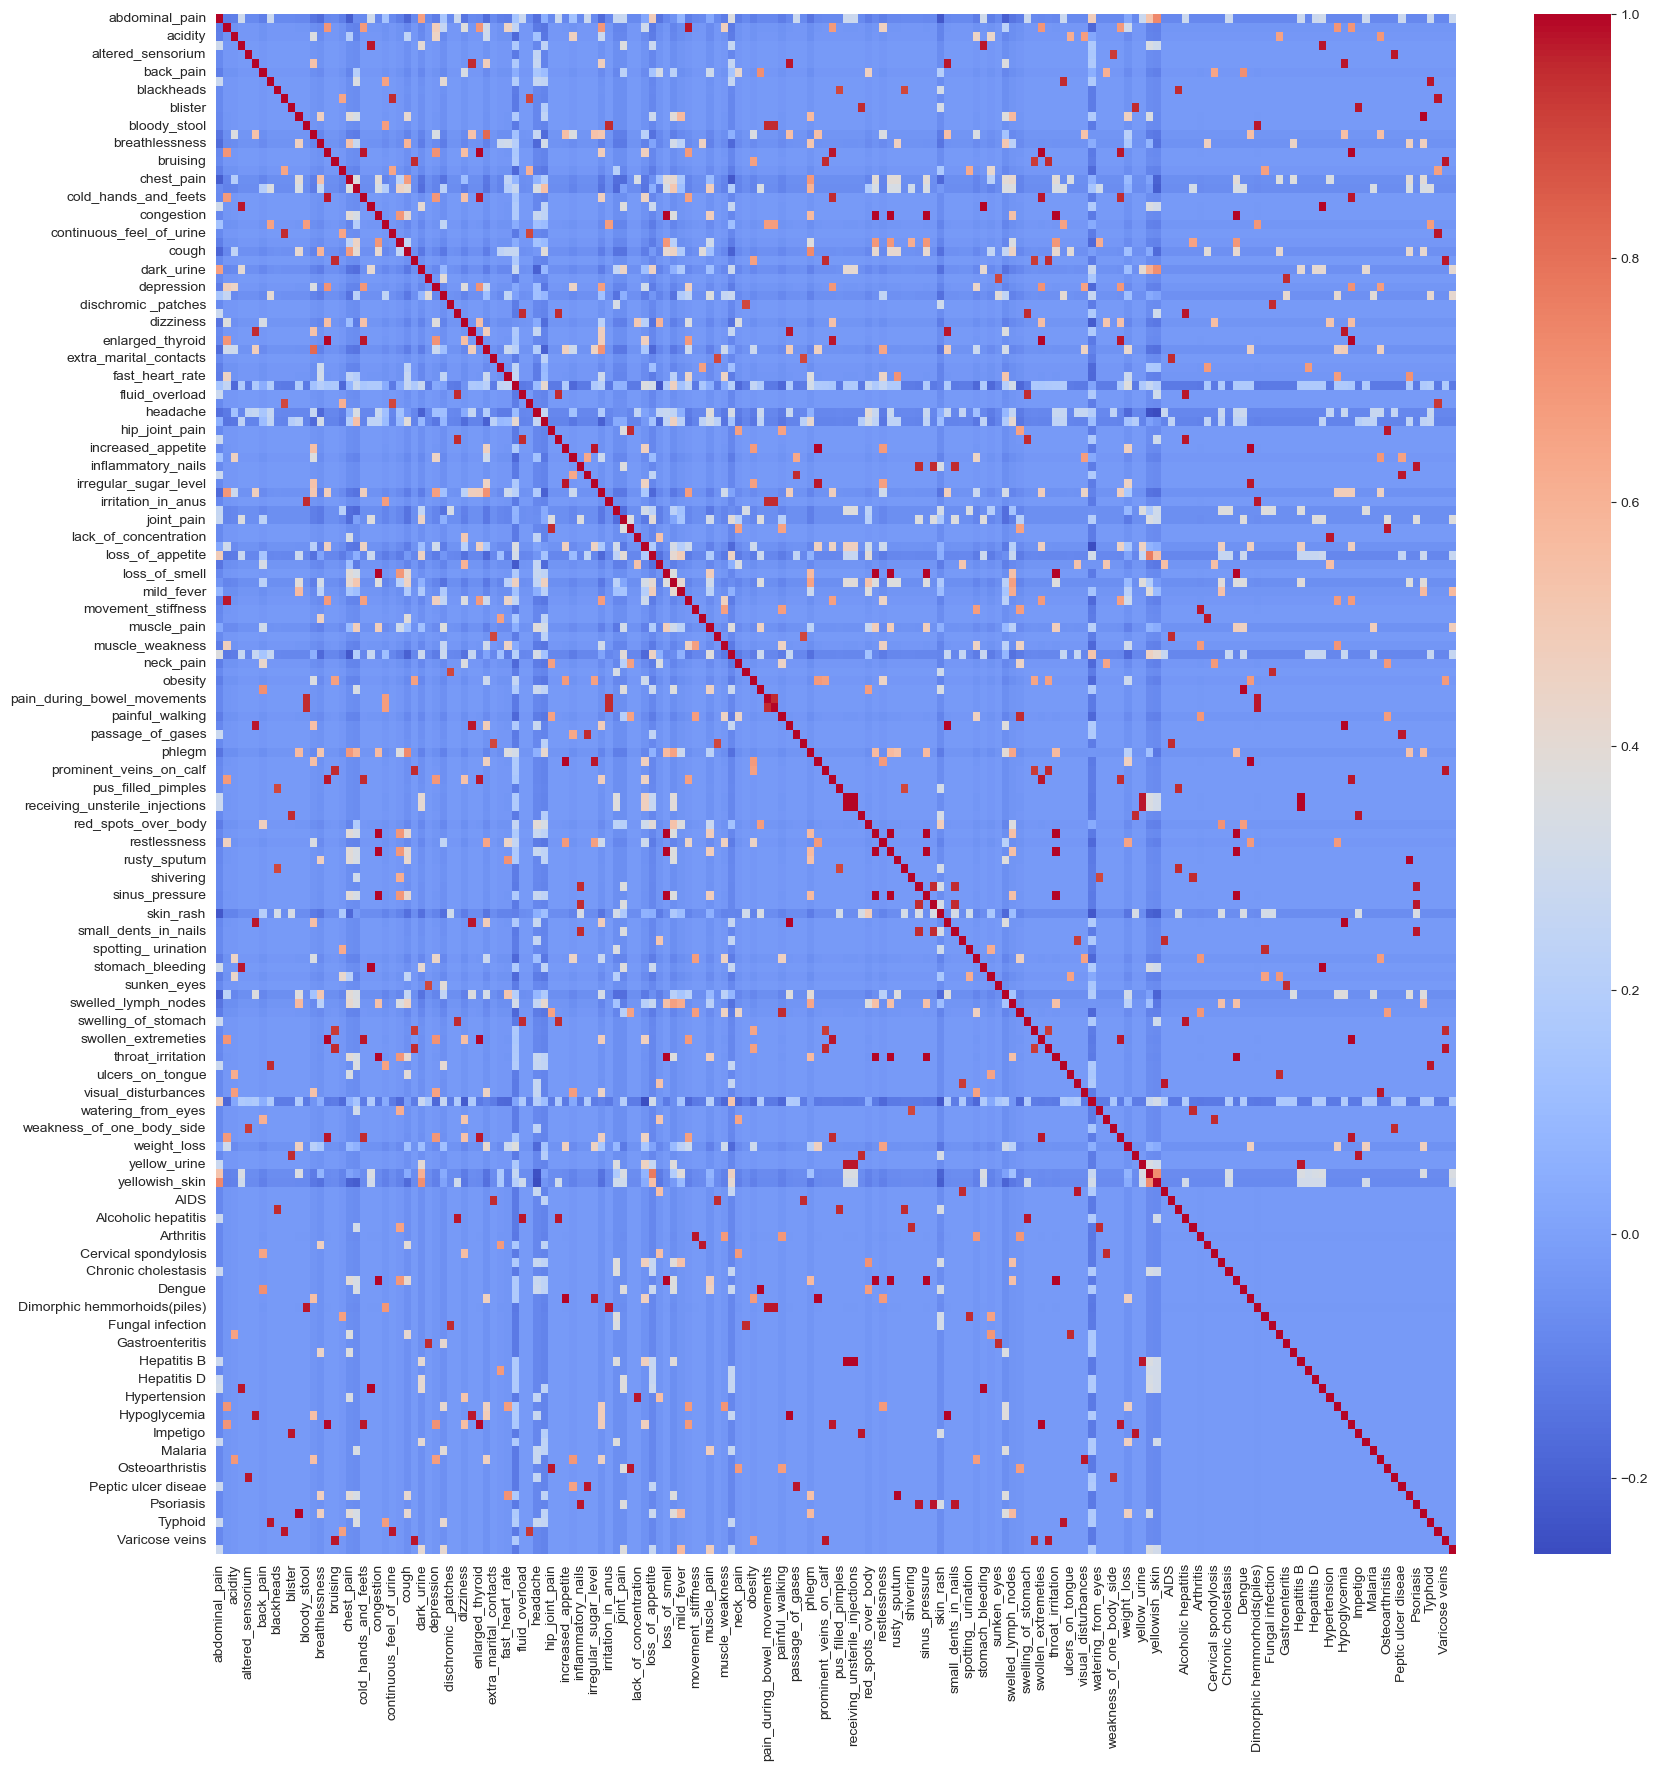

In [30]:
# Heatmap of correlation between symptoms and diseases
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df_one_hot_sampled.iloc[:, 0:len(symptoms) + len(diseases)].corr(), annot=False, fmt='.2f', cmap='coolwarm')
plt.show()

# Models

## Train and test split

In [95]:
X_train = df_on_hot_train.iloc[:, 0:len(symptoms)]
y_train = df_on_hot_train.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

X_test = df_on_hot_test.iloc[:, 0:len(symptoms)]
y_test = df_on_hot_test.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

## Custom Grid Search

In [96]:
from sklearn.model_selection import ParameterGrid
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class CustomGridSearch:
    def __init__(self, estimator, param_grid):
        self.estimator = estimator
        self.param_grid = param_grid
        self.results_ = []

    def fit(self, X_train, y_train, X_test, y_test):
        best_score = 0
        best_params = None
        for params in ParameterGrid(self.param_grid):
            model = clone(self.estimator).set_params(**params)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            result = {**params, 'test_score': score}
            self.results_.append(result)
            if score > best_score:
                best_score = score
                best_params = params

        self.best_score_ = best_score
        self.best_params_ = best_params
        self.best_estimator_ = clone(self.estimator).set_params(**best_params)
        self.best_estimator_.fit(X_train, y_train)

    def score(self, X, y):
        return self.best_estimator_.score(X, y)

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train_labels)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test_labels))
print(accuracy_score(y_test_labels, y_pred))

from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True)).transpose()
classification_report_df


1.0
1.0


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,19.0
AIDS,1.0,1.0,1.0,19.0
Acne,1.0,1.0,1.0,19.0
Alcoholic hepatitis,1.0,1.0,1.0,4.0
Allergy,1.0,1.0,1.0,6.0
Arthritis,1.0,1.0,1.0,20.0
Bronchial Asthma,1.0,1.0,1.0,6.0
Cervical spondylosis,1.0,1.0,1.0,4.0
Chicken pox,1.0,1.0,1.0,5.0
Chronic cholestasis,1.0,1.0,1.0,4.0


## KNN

C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

best mean cross-validation score: 1.000
best parameters: {'n_neighbors': 3}


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


test-set score: 1.000


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy: 1.00


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


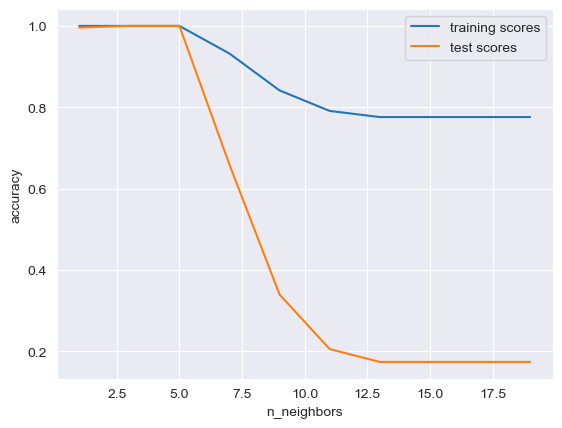

In [98]:
from sklearn.neighbors import KNeighborsClassifier

#Model complexity
neighbors = range(1, 20, 2)

training_scores = []
test_scores = []

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# GridSearch
param_grid_knn = {'n_neighbors': np.arange(1, 20, 2)}

grid = CustomGridSearch(KNeighborsClassifier(), param_grid_knn)
grid.fit(X_train, y_train, X_test, y_test)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

# KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors']) 
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)


## Decision Tree

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df


accuracy: 0.91


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.000000,0.894737,0.944444,19.000000
AIDS,0.950000,1.000000,0.974359,19.000000
Acne,1.000000,0.894737,0.944444,19.000000
Alcoholic hepatitis,1.000000,0.500000,0.666667,4.000000
Allergy,1.000000,1.000000,1.000000,6.000000
Arthritis,1.000000,0.950000,0.974359,20.000000
Bronchial Asthma,1.000000,0.666667,0.800000,6.000000
Cervical spondylosis,1.000000,0.500000,0.666667,4.000000
Chicken pox,1.000000,0.600000,0.750000,5.000000
Chronic cholestasis,0.375000,0.750000,0.500000,4.000000


best score: 0.917
best parameters: {'max_depth': 28}
test-set score: 0.917


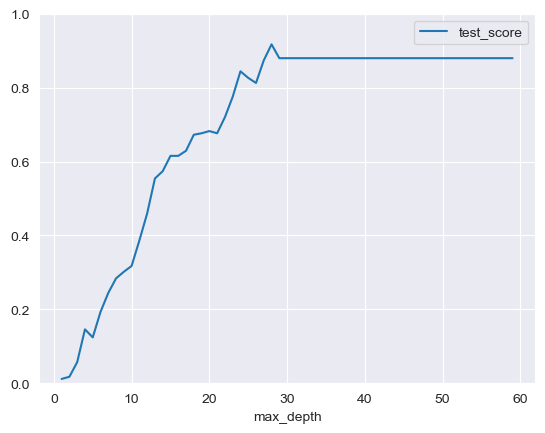

In [91]:
param_grid = {'max_depth': range(1, 60, 1)}

grid = CustomGridSearch(DecisionTreeClassifier(random_state=42, max_features=3), param_grid)
grid.fit(X_train, y_train_labels, X_test, y_test_labels)

scores = pd.DataFrame(grid.results_)

scores.plot(x='max_depth', y='test_score', ylim=(0, 1))

print("best score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

best mean cross-validation score: 0.917
best parameters: {'max_depth': 28, 'max_features': 3}
test-set score: 0.917


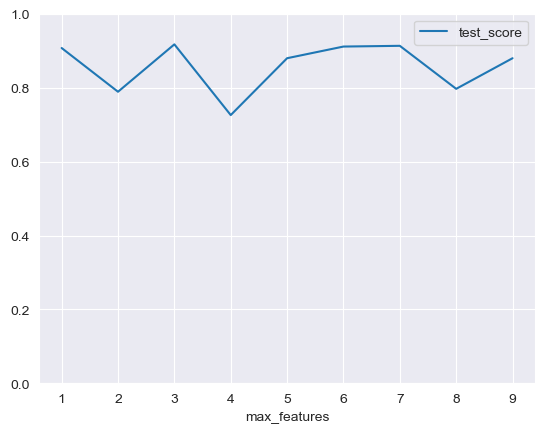

In [92]:
param_grid = {'max_features': range(1, 10, 1), 'max_depth': [grid.best_params_['max_depth']]}

grid = CustomGridSearch(DecisionTreeClassifier(random_state=42), param_grid)

grid.fit(X_train, y_train_labels, X_test, y_test_labels)

scores = pd.DataFrame(grid.results_)

scores.plot(x='max_features', y='test_score', ylim=(0, 1))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

In [93]:
# Decision Tree with the best parameters
clf = DecisionTreeClassifier(random_state=42, max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'])
clf.fit(X_train, y_train_labels)
print("train accuracy: {:.2f}".format(clf.score(X_train, y_train_labels)))
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)
print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

train accuracy: 0.99
accuracy: 0.92


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,0.826087,1.000000,0.904762,19.00000
AIDS,0.703704,1.000000,0.826087,19.00000
Acne,1.000000,0.894737,0.944444,19.00000
Alcoholic hepatitis,1.000000,0.750000,0.857143,4.00000
Allergy,1.000000,0.666667,0.800000,6.00000
Arthritis,1.000000,0.950000,0.974359,20.00000
Bronchial Asthma,1.000000,0.666667,0.800000,6.00000
Cervical spondylosis,1.000000,0.500000,0.666667,4.00000
Chicken pox,0.800000,0.800000,0.800000,5.00000
Chronic cholestasis,0.500000,0.250000,0.333333,4.00000


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
clf = RandomForestClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))
# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

accuracy: 1.00


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,19.0
AIDS,1.0,1.0,1.0,19.0
Acne,1.0,1.0,1.0,19.0
Alcoholic hepatitis,1.0,1.0,1.0,4.0
Allergy,1.0,1.0,1.0,6.0
Arthritis,1.0,1.0,1.0,20.0
Bronchial Asthma,1.0,1.0,1.0,6.0
Cervical spondylosis,1.0,1.0,1.0,4.0
Chicken pox,1.0,1.0,1.0,5.0
Chronic cholestasis,1.0,1.0,1.0,4.0


## Neural Network

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

X_train_n = X_train.to_numpy()
y_train_labels_n = y_train_labels.to_numpy()
X_test_n = X_test.to_numpy()
y_test_labels_n = y_test_labels.to_numpy()

input_dim = X_train.shape[1]
output_dim = len(diseases)

# Function to create the Keras model
def create_model(neurons_1=128, neurons_2=64, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons_1, input_dim=input_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons_2, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3)
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

# Define the hyperparameter grid
param_grid = {
    'neurons_1': [8, 16, 32],
    'neurons_2': [4, 8, 16],
    'dropout_rate': [0.1, 0.3, 0.5]
}

# Create the GridSearchCV object
cv = StratifiedKFold(n_splits=3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=2)

# Perform the grid search
grid_result = grid.fit(X_train_n, y_train_labels_n)

# Print the results of the best hyperparameters
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train and evaluate the best model on the test set
best_model = grid_result.best_estimator_
best_model.fit(X_train_n, y_train_labels_n)
test_accuracy = best_model.score(X_test_n, y_test_labels_n)
print(f"Test accuracy: {test_accuracy:.4f}")


C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_16348\3502298226.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])


Fitting 3 folds for each of 27 candidates, totalling 81 fits
5/5 [==============================] - 0s 750us/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=4; total time=   0.7s
5/5 [==============================] - 0s 752us/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=4; total time=   0.6s
5/5 [==============================] - 0s 746us/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=4; total time=   0.6s
5/5 [==============================] - 0s 1ms/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=8; total time=   0.7s
5/5 [==============================] - 0s 2ms/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=8; total time=   0.8s
5/5 [==============================] - 0s 1ms/step
[CV] END .........dropout_rate=0.1, neurons_1=8, neurons_2=8; total time=   0.7s
5/5 [==============================] - 0s 750us/step
[CV] END ........dropout_rate=0.1, neurons_1=8, neurons_2=16; total time=   0.8s
5/5 [==

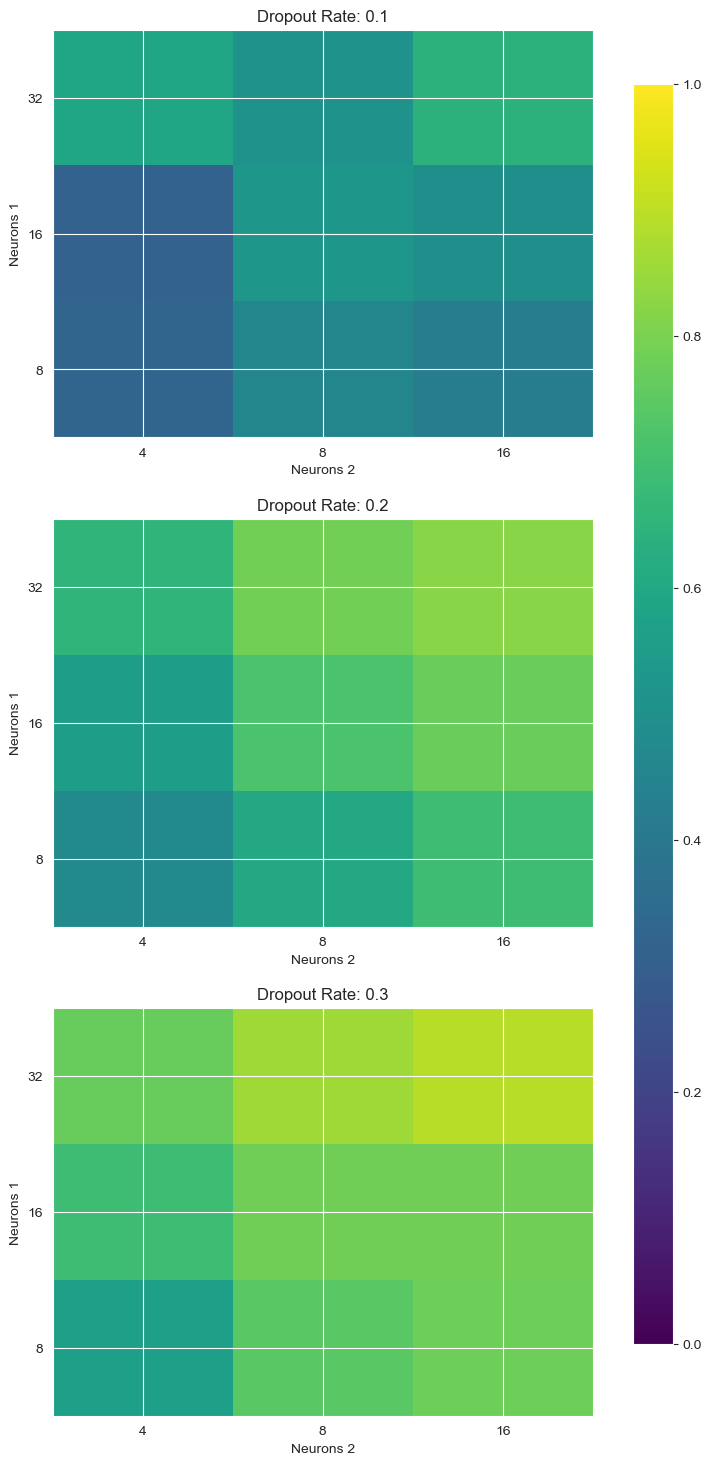

In [40]:
import numpy as np
import matplotlib.pyplot as plt

mean_test_scores = np.array(grid_result.cv_results_['mean_test_score'])

# Reshape the mean test scores into a 3D array
mean_test_scores = mean_test_scores.reshape(len(param_grid['neurons_1']), len(param_grid['neurons_2']), len(param_grid['dropout_rate']))

fig, ax = plt.subplots(len(param_grid['dropout_rate']), figsize=(8, 6 * len(param_grid['dropout_rate'])))

for k, dr in enumerate(param_grid['dropout_rate']):
    im = ax[k].imshow(mean_test_scores[::-1, :, k], cmap='viridis', aspect='auto', origin='lower', vmin=0, vmax=1)
    ax[k].set_title(f'Dropout Rate: {dr}')
    ax[k].set_xticks(range(len(param_grid['neurons_2'])))
    ax[k].set_xticklabels(param_grid['neurons_2'])
    ax[k].set_yticks(range(len(param_grid['neurons_1'])))
    ax[k].set_yticklabels(param_grid['neurons_1'])
    ax[k].set_xlabel('Neurons 2')
    ax[k].set_ylabel('Neurons 1')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()


## Random forest with prediction details

In [65]:
# Emulate user input with 5 random symptoms
user_symptoms_list = pd.DataFrame(symptoms).sample(2).values.tolist()
print(user_symptoms_list)

# Create a DataFrame with 'symptom' column
user_symptoms_df = pd.DataFrame(user_symptoms_list, columns=['symptom'])

# Initialize an empty DataFrame with all symptom columns
empty_symptoms_encoded = pd.DataFrame(columns=symptoms, dtype=np.uint8)
empty_symptoms_encoded.loc[0] = [0] * len(symptoms)
user_symptoms_encoded = empty_symptoms_encoded.copy()
# Set the corresponding columns of the random symptoms to 1
for symptom in user_symptoms_list:
    user_symptoms_encoded[symptom[0]] = 1

# Reorder columns to match the features in the train set
user_symptoms_encoded = user_symptoms_encoded[X_train.columns]
empty_symptoms_encoded = empty_symptoms_encoded[X_train.columns]

# Create a dataframe with the probabilities
user_symptoms_prob = pd.DataFrame(clf.predict_proba(user_symptoms_encoded), columns=clf.classes_)
user_symptoms_prob = user_symptoms_prob.transpose()
user_symptoms_prob.columns = ['probability']
user_symptoms_prob = user_symptoms_prob.sort_values(by=['probability'], ascending=False)

# Print the top 5 diseases
user_symptoms_prob.head(5)


[['yellow_urine'], ['mood_swings']]


,probability
Allergy,0.10
Heart attack,0.09
Hepatitis B,0.08
Fungal infection,0.08
Hyperthyroidism,0.07


## Neural network with prediction details

In [66]:
def predict_diseases(symptoms, model, input_columns, diseases, top_k=5):
    # Create a new DataFrame with the same columns as the training data
    input_data = pd.DataFrame(columns=input_columns, index=[0])

    # Set the values for the given symptoms to 1
    for symptom in symptoms:
        if symptom in input_columns:
            input_data[symptom] = 1

    # Convert the input data to a numpy array of type float32
    input_data_n = input_data.to_numpy().astype(np.float32)

    #replace all nan values with 0
    input_data_n = np.nan_to_num(input_data_n)

    # Make predictions using the trained model
    prediction = model.predict_proba(input_data_n)

    # Get the indices of the top k predictions
    top_k_indices = prediction.argsort()[0][-top_k:][::-1]

    # Get the corresponding disease names and probabilities
    top_diseases = [(diseases[i], prediction[0][i]) for i in top_k_indices]

    return top_diseases



# Emulate user input with 5 random symptoms
user_symptoms_list = pd.DataFrame(symptoms).sample(4)
user_symptoms_list = user_symptoms_list.values.tolist()
user_symptoms_list = [item for sublist in user_symptoms_list for item in sublist]
print(user_symptoms_list)

# Get the top 5 predictions
input_columns = X_train.columns
top_diseases = predict_diseases(user_symptoms_list, best_model, input_columns, diseases)

for i, (disease, prob) in enumerate(top_diseases, 1):
    print(f"{i}. {disease}: {prob:.4f}")


['skin_peeling', 'pus_filled_pimples', 'pain_in_anal_region', 'blister']
1/1 [==============================] - 0s 25ms/step
1. Paralysis (brain hemorrhage): 0.1408
2. Varicose veins: 0.0909
3. Gastroenteritis: 0.0908
4. Arthritis: 0.0864
5. GERD: 0.0792


In [67]:
import itertools

# List every possible combination of symptoms
symptom_combinations = []
for i in range(1, 4):
    print(f"Calculating combinations of {i} symptoms...")
    symptom_combinations += list(itertools.combinations(symptoms, i))

print(f"There are {len(symptom_combinations)} possible combinations of symptoms.")

Calculating combinations of 1 symptoms...
Calculating combinations of 2 symptoms...
Calculating combinations of 3 symptoms...
There are 374791 possible combinations of symptoms.


In [69]:
# Heatmap of the chance of getting a disease based on the presence of a symptom

# Create an empty DataFrame to store the probabilities
prob_df_clf = pd.DataFrame(columns=symptoms, index=diseases)
prob_df_nn = pd.DataFrame(columns=symptoms, index=diseases)

# Iterate over all diseases
for disease in diseases:
    # Create an empty list to store the probabilities
    prob_list_clf = []
    prob_list_nn = []

    # Iterate over all symptoms
    for symptom in symptoms:
        # Create a copy of the user input DataFrame
        user_input = empty_symptoms_encoded.copy()

        # Set the symptom to 1
        user_input[symptom] = 1

        # Make a prediction using the trained model
        prediction_clf = clf.predict_proba(user_input)
        prediction_nn = best_model.predict_proba(user_input, verbose=0)

        # Get the probability of the disease
        disease_prob_clf = prediction_clf[0][clf.classes_ == disease][0]
        disease_prob_nn = prediction_nn[0][best_model.classes_ == disease][0]

        # Append to the list
        prob_list_clf.append(disease_prob_clf)
        prob_list_nn.append(disease_prob_nn)

    # Add the list to the DataFrame
    prob_df_clf.loc[disease] = prob_list_clf
    prob_df_nn.loc[disease] = prob_list_nn

# Convert the DataFrame to a numpy array
prob_array_clf = prob_df_clf.to_numpy().astype(np.float32)
prob_array_nn = prob_df_nn.to_numpy().astype(np.float32)

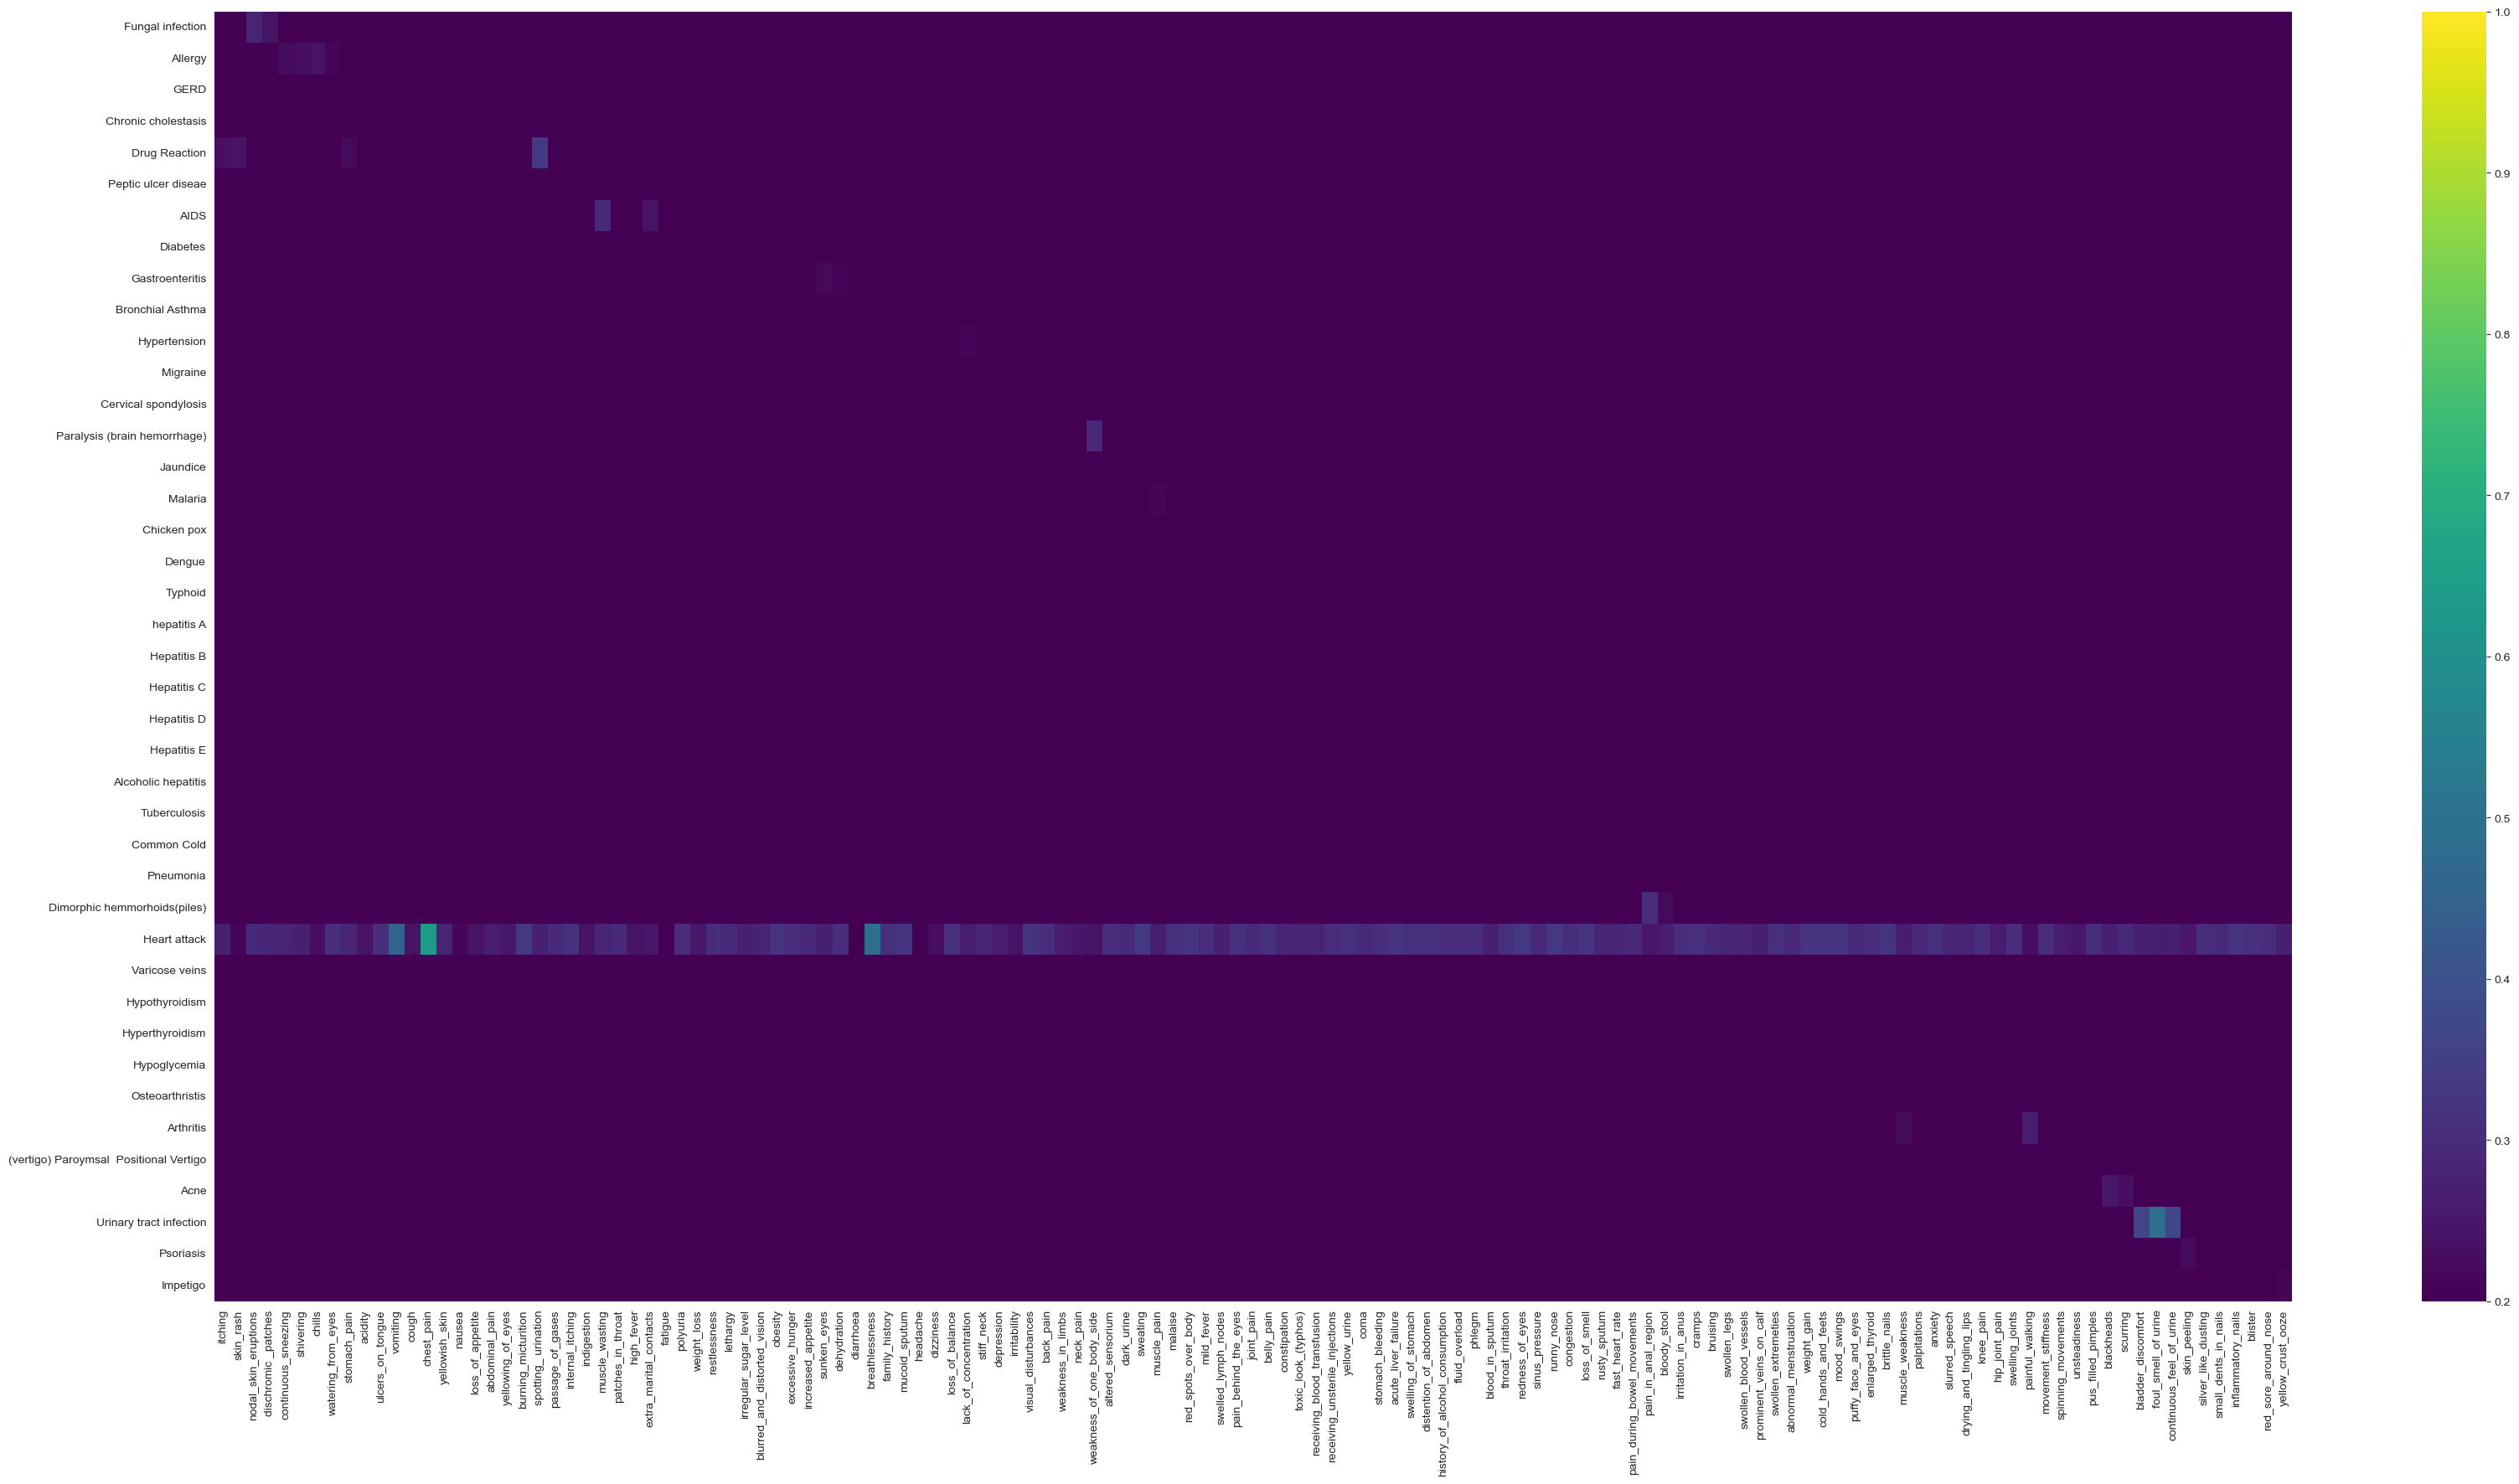

In [52]:
# Plot the heatmap for the random forest model
plt.figure(figsize=(40, 20))
sns.heatmap(prob_array_clf, cmap='viridis', xticklabels=symptoms, yticklabels=diseases, vmin=0.01, vmax=1)
plt.show()

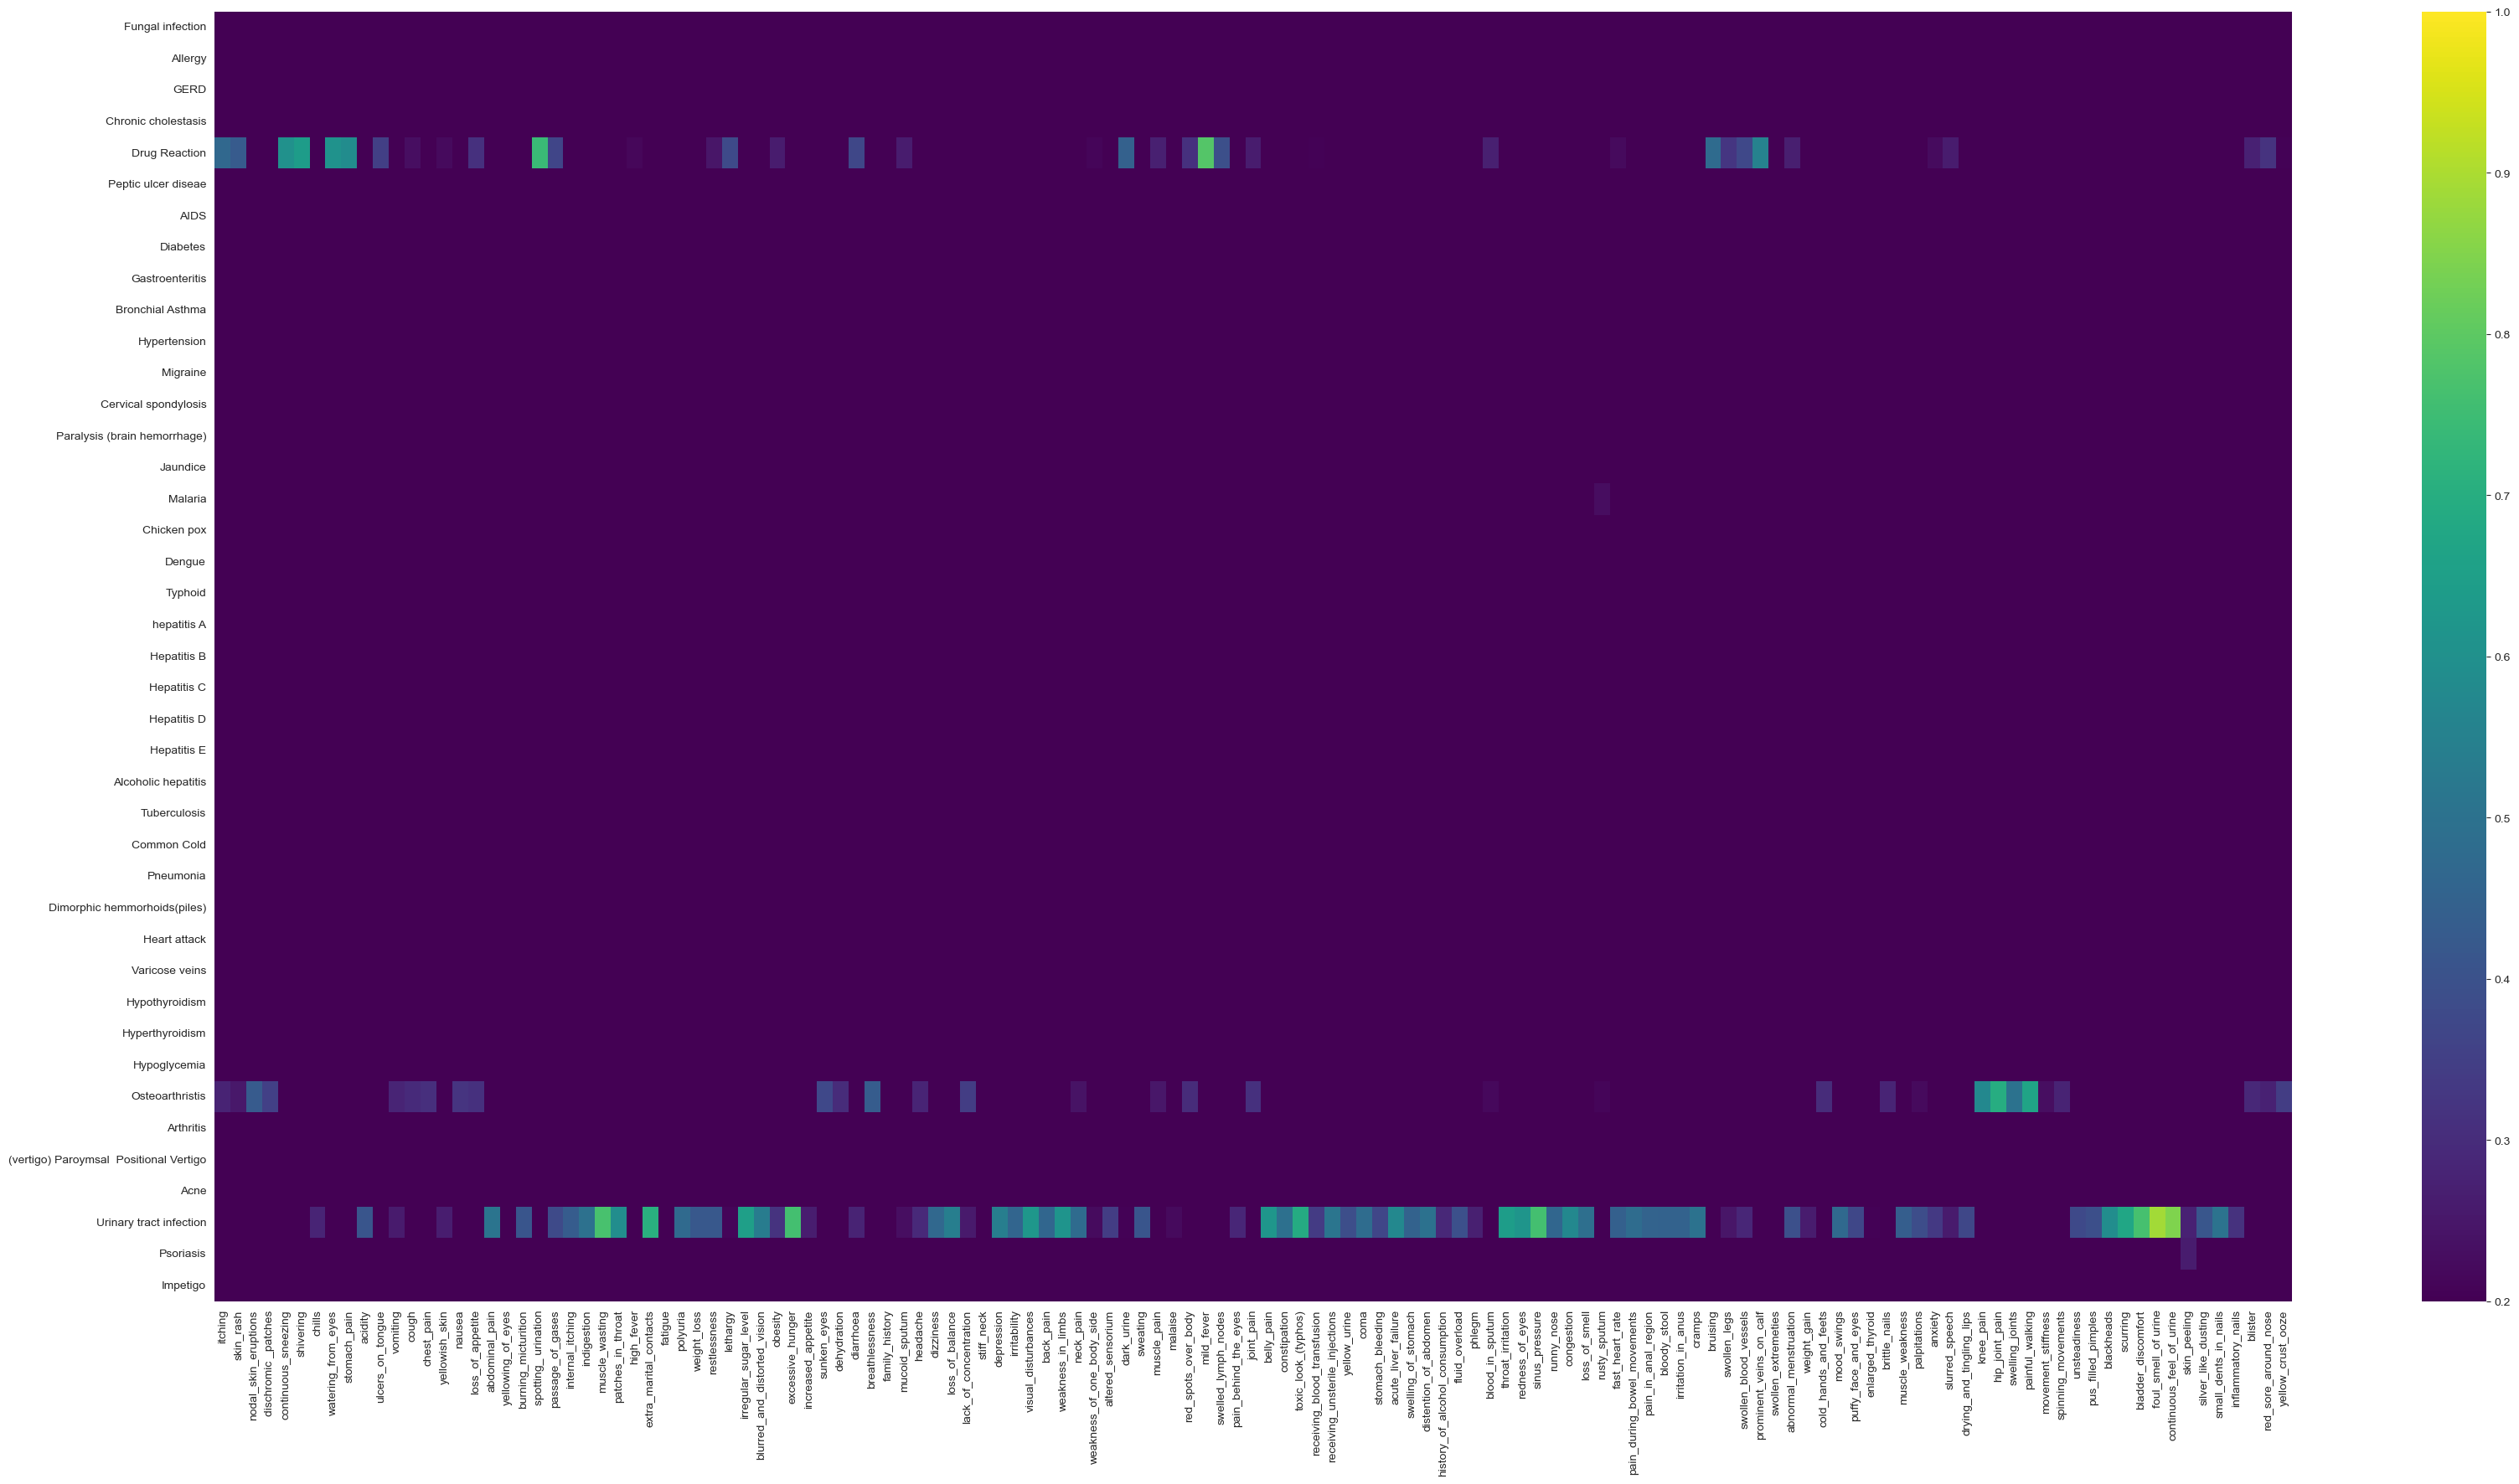

In [53]:
# Plot the heatmap for the neural network model
plt.figure(figsize=(40, 20))
sns.heatmap(prob_array_nn, cmap='viridis', xticklabels=symptoms, yticklabels=diseases, vmin=0.01, vmax=1)
plt.show()